# Tutorial: Pandas for software engineering research

- **Auhtor**: Felipe Ortega.
- **Date**: June 7, 2017.
- **Venue**: SATToSE 2017 Workshop.
- **Location**: URJC. Madrid.
- **Part**: 2 of 2.

## 6. Basic descriptive analysis

Let's obtain some basic descriptive analytics from the data describing Scratch projects.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Display graphs in the notebook
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

# To use the 'ggplot' style for graphs uncomment the following line
# matplotlib.style.use('ggplot')

### 6.1 Average grades

In [6]:
import pymysql.cursors

# Get new connection with local MySQL DB
connection = pymysql.connect(host='localhost',
                             user='jfelipe',
                             password='phoenix',
                             db='Scratch_data',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        # Read some data
        sql = """SELECT * FROM grades"""
        cursor.execute(sql)
        grades = cursor.fetchall()
finally:
    connection.close()

In [7]:
col_names = [x[0] for x in cursor.description]
grades_df = pd.DataFrame(grades, columns = col_names)

In [8]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231050 entries, 0 to 231049
Data columns (total 12 columns):
project_ID            231050 non-null int64
Abstraction           231050 non-null float64
Parallelism           231050 non-null float64
Logic                 231050 non-null float64
Synchronization       231050 non-null float64
FlowControl           231050 non-null float64
UserInteractivity     231050 non-null float64
DataRepresentation    231050 non-null float64
Mastery               231050 non-null float64
Clones                231050 non-null float64
CustomBlocks          231050 non-null float64
InstancesSprites      231050 non-null int64
dtypes: float64(10), int64(2)
memory usage: 21.2 MB


In [9]:
grades_df.columns

Index(['project_ID', 'Abstraction', 'Parallelism', 'Logic', 'Synchronization',
       'FlowControl', 'UserInteractivity', 'DataRepresentation', 'Mastery',
       'Clones', 'CustomBlocks', 'InstancesSprites'],
      dtype='object')

In [29]:
grades_df.iloc[:, 1:].mean()

Abstraction           1.057053
Parallelism           1.148150
Logic                 0.756369
Synchronization       1.233473
FlowControl           1.887020
UserInteractivity     1.563597
DataRepresentation    1.273335
Mastery               8.918996
Clones                0.508396
CustomBlocks          0.642285
InstancesSprites      0.098866
dtype: float64

### 6.2 Statistics per project

In [22]:
import pymysql.cursors

# Get new connection with local MySQL DB
connection = pymysql.connect(host='localhost',
                             user='jfelipe',
                             password='phoenix',
                             db='Scratch_data',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        # Read some data
        sql = """SELECT * FROM project"""
        cursor.execute(sql)
        projects = cursor.fetchall()
finally:
    connection.close()

In [69]:
col_names = [x[0] for x in cursor.description]
projects_df = pd.DataFrame(projects, columns = col_names)
projects_df.rename(columns={"project-name": "project_name", "total-views":"total_views",
                            "total-remixes": "total_remixes", "total-favorites": "total_favorites",
                            "total-loves": "total_loves", "is-remix": "is_remix"}, inplace=True)

In [70]:
projects_df.columns

Index(['p_ID', 'project_name', 'username', 'total_views', 'total_remixes',
       'total_favorites', 'total_loves', 'is_remix'],
      dtype='object')

#### Histogram of total_views

In [71]:
projects_df.iloc[:, 1:].describe()

,total_views,total_remixes,total_favorites,total_loves,is_remix
count,250163.000000,250163.000000,250163.000000,250163.000000,250163.000000
mean,5.754100,0.064846,0.537629,0.410269,0.051271
std,116.454406,1.166248,9.662281,7.439522,0.220550
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000
max,27993.000000,306.000000,2582.000000,1940.000000,1.000000


In [92]:
projects_df_log = (projects_df[["total_views", "total_favorites", "total_loves"]]
                   .applymap(lambda x: np.log10(2 + x)) )

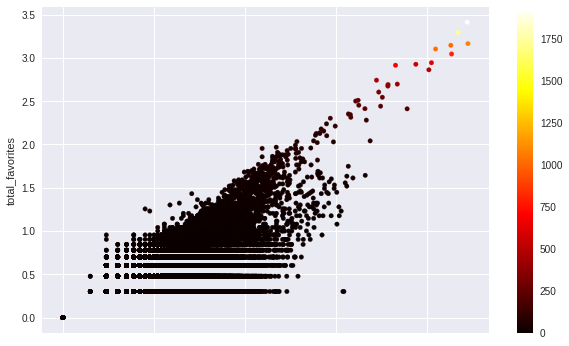

In [97]:
ax = projects_df_log.plot.scatter('total_views', 'total_favorites', c=projects_df.total_loves, cmap='hot')
ax.set_xlabel("total_views")

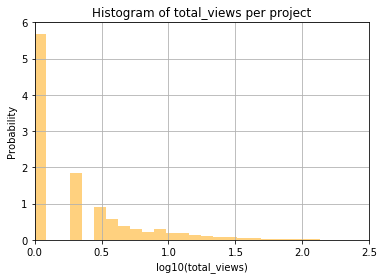

In [86]:
# Creating histogram
n, bins, patches = plt.hist(projects_df_log["total_views"].values, 50, normed=1, facecolor='orange', alpha=0.5)
plt.xlabel('log10(total_views)')
plt.ylabel('Probability')
plt.title('Histogram of total_views per project')
plt.axis([0, 2.5, 0, 6])
plt.grid(True)
plt.show()

## 7. Grahpics: Seaborn

[`Seaborn`](https://seaborn.pydata.org/) is a modern data visualization library for Python, based on the core library `matplotlib`, and created by Michael Waskom. `Seaborn` provides a high-level interface with many automations that facilitate the creation and configuration of graphs. It is fully integrated with the rest of the Python scientific stack components, including `NumPy`, `Pandas` and math and stats methods in `SciPy`.

Among its main features we can cite:

* Predefined visual themes that improve the default aesthetics of `matplotlib` graphs.
* Tools to select harmonised colour palettes or palettes for specific purposes.
* Specific methods for univariate and multivariate data, or for comparing data subsets.
* Integration of linear models in statistics.
* Functions to visualise data matrices.
* Support for clustering algorithms in machine learning.
* Advanced representation of time series data, including forecasting estimation, as well as uncertainty intervals for predictions.

Let's see how we can improve data visualization in `Pandas` with `Seaborn`:

In [87]:
import seaborn as sns

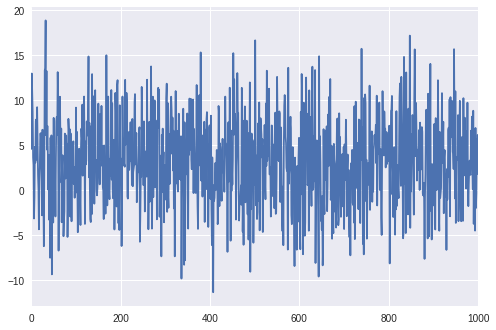

In [88]:
norm_3_5 = pd.Series(np.random.normal(loc=3, scale=5, size=1000))
norm_3_5.plot()

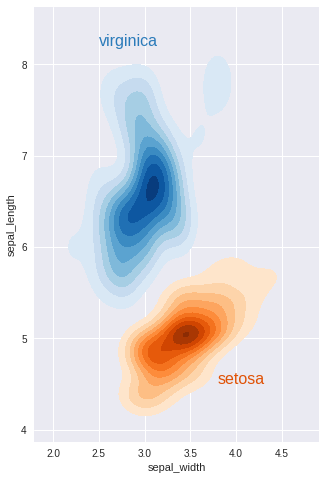

In [90]:
# Using the 'iris' dataset integrated in Seaborn
# https://archive.ics.uci.edu/ml/datasets/iris
iris = sns.load_dataset("iris")

# We create two groups for two different species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Graph configuration
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# We create two prob. density diagrams (2-D projection)
# We choose a different colour palette for each group
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Oranges", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Set up colour palettes and add text labels
red = sns.color_palette("Oranges")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

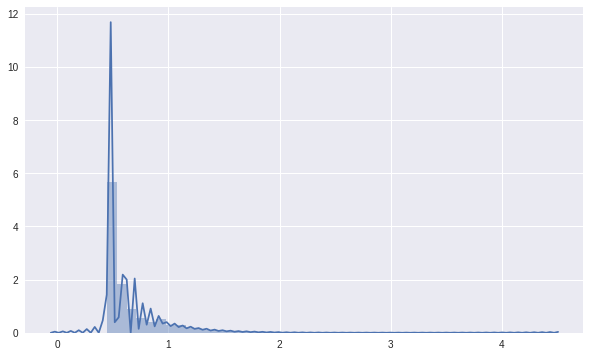

In [100]:
# Creating the previous histogram (+ prob. density plot) for `total_views` per project becomes trivial
sns.distplot(projects_df_log["total_views"].values)

The [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html) includes many useful examples on effective data representation in Python. You can also get inspired by the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) (including code to reproduce the examples).